# Index hopping correction

<b> Mai-Linh Ton </b>

In [1]:
# Load packages
suppressPackageStartupMessages(library(DropletUtils))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(Matrix))

In [2]:
##===Write list of directories to all molecule_info.h5 files from cellranger output===##
#== SAMPLES: 1:6 => GD7 | 7:11 => GD8 | 12:26 GD9  ==#

# set directories (GD7,8,9)

#GD7
wd= paste0("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGA",LETTERS[1:6],"9/")

#GD8
wd[7:11] = paste0("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGA",LETTERS[1:5],"11/")

#GD9
wd[12:19] = paste0("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGA",LETTERS[1:8],"12/")
wd[20:23] = paste0("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGA",LETTERS[c(5:8)],"8/")
wd[24:26] = paste0("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGA",LETTERS[6:8],"11/")

wd

#check paths as these need to correspond to the actual paths to the molecule_info.h5 files

[1] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAA9/" 
 [2] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAB9/" 
 [3] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAC9/" 
 [4] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAD9/" 
 [5] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAE9/" 
 [6] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAF9/" 
 [7] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAA11/"
 [8] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAB11/"
 [9] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAC11/"
[10] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAD11/"
[11] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAE11/"
[12] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAA12/"
[13] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAB12/"
[14] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAC12/"
[15] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAD12/"
[16] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAE12/"
[17] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAF12/"
[18] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAG12/"
[19] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAH12/"
[20] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAE8/" 
[21] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAF8/" 
[22] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAG8/" 
[23] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAH8/" 
[24] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAF11/"
[25] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAG11/"
[26] "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/align_edited/SLX18995_rabbit_SIGAH11/"

In [7]:
#List of directories to each molecule_h5 file
molecule_h5 = paste0(wd, "outs/molecule_info.h5")


##===Write the output directories===##
dirout = ("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/")

out_loc=paste0(dirout, "swapped/sample", 1:26, "/matrix.mtx")
bc_loc=paste0(dirout, "swapped/sample", 1:26, "/barcodes.tsv")
gene_loc=paste0(dirout, "swapped/sample", 1:26, "/genes.tsv")

In [8]:
##===For each batch, run swapped drops separately in order to correct each batch===##
unswapped = swappedDrops(molecule_h5[1:26], get.swapped = TRUE)

##==Calculate fract. swapped barcodes. Illumina's patterned flow cell technology => higher swap rates
ratios = sapply(1:length(unswapped$cleaned), function(i){
  sum(unswapped$swapped[[i]])/(sum(unswapped$cleaned[[i]]) + sum(unswapped$swapped[[i]]))
})

names(ratios) = 1:length(molecule_h5)

Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”
Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”
Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”
Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 objec

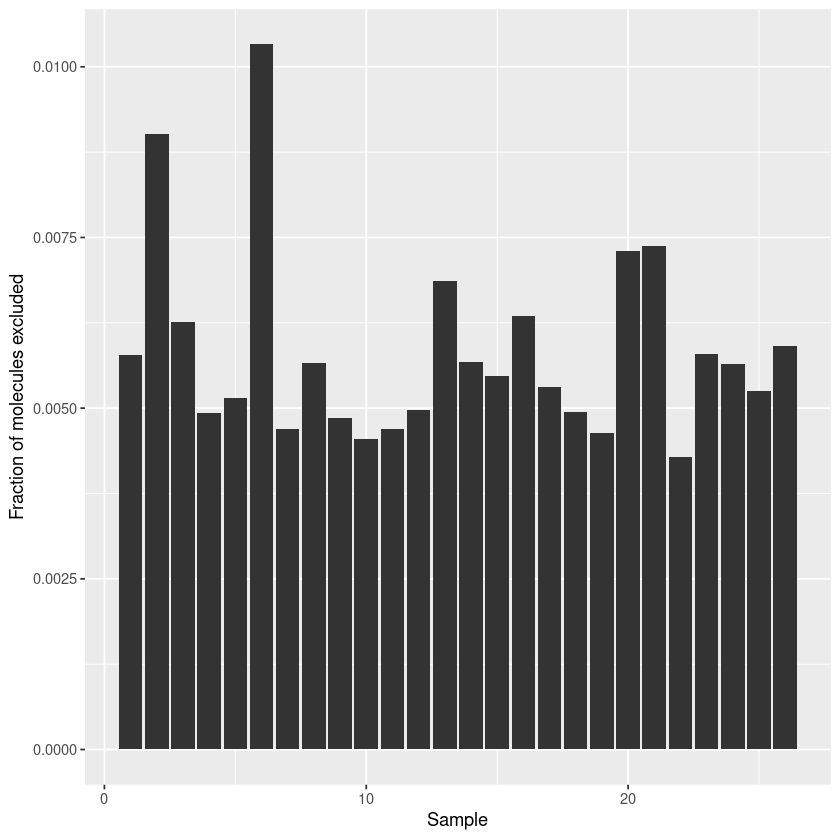

In [9]:
##===Output Final Visualization to see Fraction of Swapped Barcodes (AKA: % Index Hopping)===##

ggplot(data.frame(ratios = ratios, sample = 1:26), aes(x = sample, y = ratios)) + geom_bar(stat = "identity", fill = "grey20") + labs(x = "Sample", y = "Fraction of molecules excluded")

In [10]:
#write the output files
for(i in 1:length(molecule_h5)){
  null_holder = writeMM(unswapped$cleaned[[i]], file = out_loc[i])
  write.table(colnames(unswapped$cleaned[[i]]), file = bc_loc[i], col.names = FALSE, row.names = FALSE, quote = FALSE)
  write.table(rownames(unswapped$cleaned[[i]]), file = gene_loc[i], col.names = FALSE, row.names = FALSE, quote = FALSE)
}